Group: Seunghyeon (Hyeon) Kim

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 50
k = 1.2

In [3]:
G = nx.erdos_renyi_graph(N,k/N)

In [4]:
# actual average degree
kav = np.array(list(dict(G.degree).values())).mean()
print(kav)

0.96


In [5]:
# get the connected components
cc = nx.connected_components(G)

In [6]:
#create a list with the sizes of the connected components
sizes = [len(c) for c in cc]

In [7]:
sizes

[1,
 2,
 2,
 3,
 1,
 2,
 1,
 10,
 1,
 2,
 7,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [8]:
#get the largest
largest = max(sizes)
largest

10

In [9]:
#remove the largest
sizes.remove(largest)
sizes

[1, 2, 2, 3, 1, 2, 1, 1, 2, 7, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [10]:
#measure the mean cluster size without the largest one
np.array(sizes).mean()

1.5384615384615385

## Exercise 1
 * Create a for loop for average k from 0.5 to 2
 * Create Erdős-Rényi graphs with these target average degrees (do not case about if the actual one is a little bit off)
 * Measure the size of the largest cluster
 * Measure the average size of the other clusters without the largest one
 * Save these results in e.g. a list
 * Plot the measured quantities (size of the largest cluster, and average size of the other clusters without the largest one) as function of the average degree

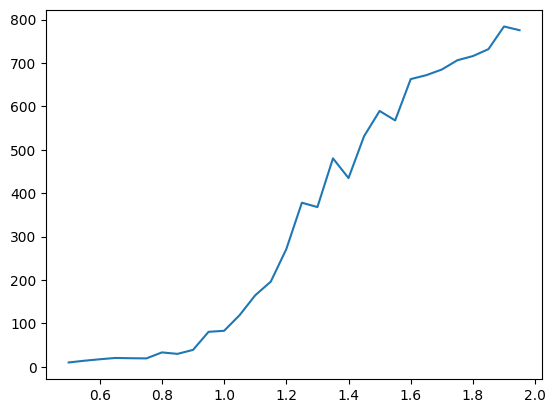

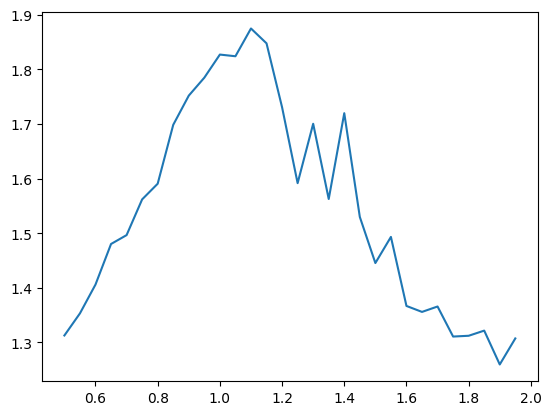

In [32]:
SINGLEGSIZE = 5
N = 1000
k = 0.5
dist = 0.05

Ggroup = []
singleG = []
singleGLS = []
singleGAS = []
largestSize = []
averageSize = []
x = []
while k < 2:
    for _ in range(SINGLEGSIZE):
        singleG.append(nx.erdos_renyi_graph(N,k/N))
    Ggroup.append(singleG)
    x.append(k)
    k += dist
    singleG = []
for eachG in Ggroup:
    for eachGraph in eachG:
        cc = nx.connected_components(eachGraph)
        sizes = [len(c) for c in cc]
        largest = max(sizes)
        singleGLS.append(largest)
        sizes.remove(largest)
        otherAvg = np.array(sizes).mean()
        singleGAS.append(otherAvg)
    largestSize.append(np.array(singleGLS).mean())
    averageSize.append(np.array(singleGAS).mean())
    singleGLS = []
    singleGAS = []
    # print(np.array(sizes).mean())
plt.plot(x, largestSize)
plt.show()
plt.plot(x, averageSize)
plt.show()


In [60]:
N = 50
m = 2
G = nx.barabasi_albert_graph(N,m)

In [61]:
bc = nx.betweenness_centrality(G)

In [62]:
list_bc = [bc[i] for i in range(len(bc))]

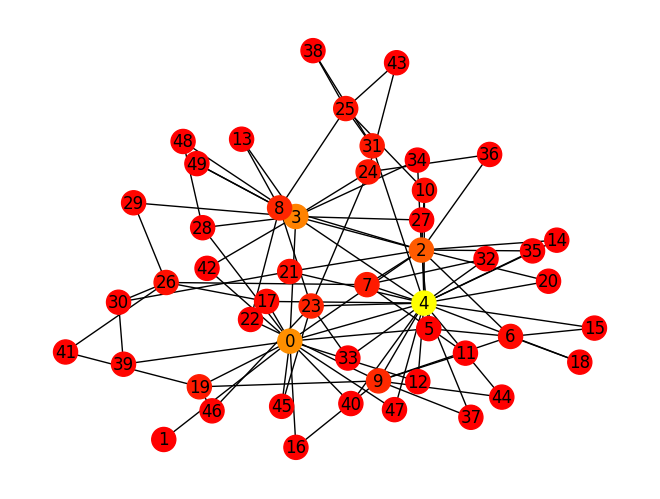

In [63]:
nx.draw(G,node_color=list_bc,with_labels=True,cmap=plt.cm.autumn)

## Exercise 2
Start from the above network and remove nodes one by one (`G.remove_node(node_index)`)
 1. Randomly
 2. The one with the highest centrality measure
 * In both cases always keep just the largest component
 * Plot the size of the network as function of the number of nodes removes


In [64]:
## Exercise 2
import random
# Start from the above network and remove nodes one by one Randomly
N = 1000
m = 2
bc = nx.betweenness_centrality(G)
list_bc = [float(i) for i in bc.values()]
indArr = np.array(G.nodes())
np.random.shuffle(indArr)
for eachRandInd in indArr:
    largest = max(list_bc)
    G.remove_node(eachRandInd)
    temp = list_bc.pop(eachRandInd)
    otherAvg = np.array(list_bc).mean()
    largestSize.append(temp)
    averageSize.append(otherAvg)

